# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [ ]:
# Your code here :
from sklearn.model_selection import train_test_split

# Split features (X) and target (y)
X = data.drop(["MEDV"],axis = 1)
y = data["MEDV"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

display(X.shape)
display(y.shape)

(506, 13)

(506,)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [ ]:
# Your code here :
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict target values for the test and train set 
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

## 3. Calculate and print R-squared for both the training and the testing set.

In [14]:
# Your code here :
from sklearn.metrics import r2_score

r2_train = r2_score(y_train,y_pred_train)
print(f'The mean squared error (for training) value is around: {round(r2_train,2)}')

r2 = r2_score(y_test, y_pred)
print(f'The mean squared error (for testing) value is around: {round(r2,2)}')



The mean squared error (for training) value is around: 0.75
The mean squared error (for testing) value is around: 0.67


## 4. Calculate and print mean squared error for both the training and the testing set.

In [ ]:
# Your code here :
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train,y_pred_train)
print(f'The mean squared error (for training) value is around: {round(mse_train,2)}')
mse_test = mean_squared_error(y_test,y_pred)
print(f'The mean squared error (for testing) value is around: {round(mse_test,2)}')



The mean squared error (for training) value is around: 21.64
The mean squared error (for testing) value is around: 24.29


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [16]:
# Your code here :
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train,y_pred_train)
print(f'The mean absolute error (for training) value is around: {round(mae_train,2)}')
mae_test = mean_absolute_error(y_test,y_pred)
print(f'The mean absolute error (for testing) value is around: {round(mae_test,2)}')


The mean absolute error (for training) value is around: 3.31
The mean absolute error (for testing) value is around: 3.19


## Classification Model Evaluation

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

In [18]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [19]:
column_names = data.feature_names

In [20]:
df = pd.DataFrame(data['data'],columns=column_names)

In [21]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
target = pd.DataFrame(data.target)

In [23]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [24]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [ ]:
# Your code here :

from sklearn.model_selection import train_test_split
X = df
print(X.shape)
y = target
print(y.shape)

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2, random_state = 42)

(150, 4)
(150, 1)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [ ]:
# Your code here :

from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model_reg = LogisticRegression()

# Train the model using the training data
model_reg.fit(X_train, y_train)

# Predict labels for the test and train set
y_pred = model_reg.predict(X_test)
print(y_pred,"\n")

y_pred_train = model_reg.predict(X_train)
print(y_pred_train)



[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] 

[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 2 0 2 0 0 2 1 2 2 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [30]:
# Your code here :
from sklearn.metrics import accuracy_score

as_train = accuracy_score(y_train, y_pred_train)
print(f"The accuracy score (for training) is around: {round(as_train,2)}")

as_test = accuracy_score(y_test, y_pred)
print(f"The accuracy score (for testing) is around: {round(as_test,2)}")


The accuracy score (for training) is around: 0.97
The accuracy score (for testing) is around: 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [ ]:
# Your code here :
from sklearn.metrics import balanced_accuracy_score

bas_train = balanced_accuracy_score(y_train, y_pred_train)
print(f"The balanced accuracy score (for training) is around: {round(bas_train,2)}")

bas_test = balanced_accuracy_score(y_test, y_pred)
print(f"The ballanced accuracy score (for testing) is around: {round(bas_test,2)}")

The accuracy score (for training) is around: 0.98
The accuracy score (for testing) is around: 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [33]:
# Your code here :
from sklearn.metrics import precision_score

ps_train = precision_score(y_train, y_pred_train, average="micro")
print(f"The precision score (for training) is around: {round(ps_train,2)}")

ps_test = precision_score(y_test, y_pred, average="micro")
print(f"The precision score (for testing) is around: {round(ps_test,2)}")

The precision score (for training) is around: 0.97
The precision score (for testing) is around: 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [ ]:
# Your code here :

from sklearn.metrics import recall_score

rs_train = recall_score(y_train, y_pred_train, average="micro")
print(f"The recall score (for training) is around: {round(rs_train,2)}")

rs_test = recall_score(y_test, y_pred, average="micro")
print(f"The recall score (for testing) is around: {round(rs_test,2)}")

The recall score (for training) is around: 0.97
The recall score (for testing) is around: 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [35]:
# Your code here :
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_pred_train, average="micro")
print(f"The F1 score (for training) is around: {round(f1_train,2)}")

f1_test = recall_score(y_test, y_pred, average="micro")
print(f"The recall score (for testing) is around: {round(f1_test,2)}")

The F1 score (for training) is around: 0.97
The recall score (for testing) is around: 1.0


## 13. Generate confusion matrices for both the training and the testing set.

[[40  0  0]
 [ 0 38  3]
 [ 0  0 39]] 



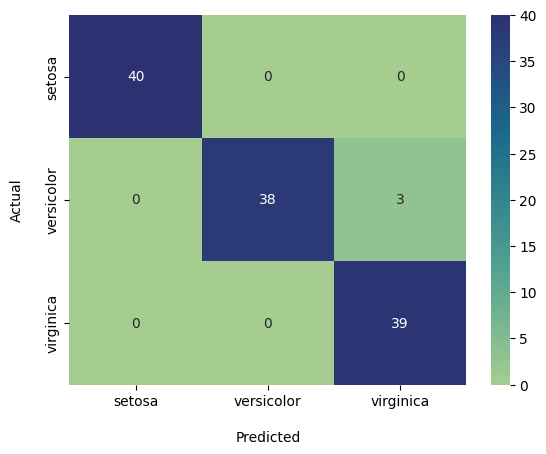

In [ ]:
# Your code here :
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrices for training and test predictions
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred)

# Print the training confusion matrix
print(cm_train,"\n")

# Plot cm_train as a heatmap
sns.heatmap(cm_train,
            xticklabels = ["setosa","versicolor","virginica"],
            yticklabels= ["setosa","versicolor","virginica"], annot= True, cmap="crest")
plt.xlabel("\nPredicted")
plt.ylabel("Actual\n")
plt.show()

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]] 



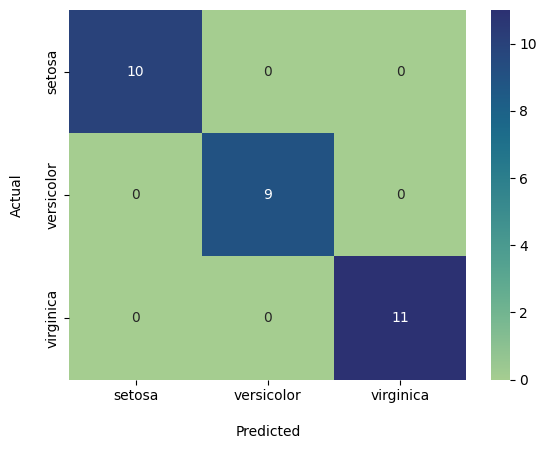

In [ ]:
# Print the testing confusion matrix
print(cm_test,"\n")

# Plot cm_test as a heatmap
sns.heatmap(cm_test,
    xticklabels= ["setosa","versicolor","virginica"],
    yticklabels= ["setosa","versicolor","virginica"], annot = True, cmap="crest")
plt.xlabel("\nPredicted")
plt.ylabel("Actual\n")
plt.show()


In [47]:
print("Logistic Regression Report:\n")
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

Logistic Regression Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        41
           2       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !